In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration.msf_bootstrapping import plot_pds, select_scales_pds

In [3]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

In [6]:
# Load data
root = '/home/tc/OneDrive/Software/MSFiltration/experiments/results/'

with open(root+'bootstrap_sbm_05-27_10:07.pkl', 'rb') as handle:
    results_sbm = pickle.load(handle)

persistence_sbm_folded = results_sbm['persistence']

with open(root+'bootstrap_er_05-27_02:15.pkl', 'rb') as handle:
    results_er = pickle.load(handle)

persistence_er_folded = results_er['persistence']

In [5]:
log_times = np.log10(results_er['ms_results'][0]['times'])

In [30]:
persistence_er_folded[19][10][2]

array([], shape=(0, 2), dtype=float64)

In [7]:
persistence_sbm = []

for i in range(len(persistence_sbm_folded)):
    persistence_sbm += persistence_sbm_folded[i]

In [8]:
persistence_er = []

for i in range(len(persistence_er_folded)):
    persistence_er += persistence_er_folded[i]

(<Figure size 576x504 with 1 Axes>,
 <AxesSubplot:xlabel='Birth', ylabel='Death'>)

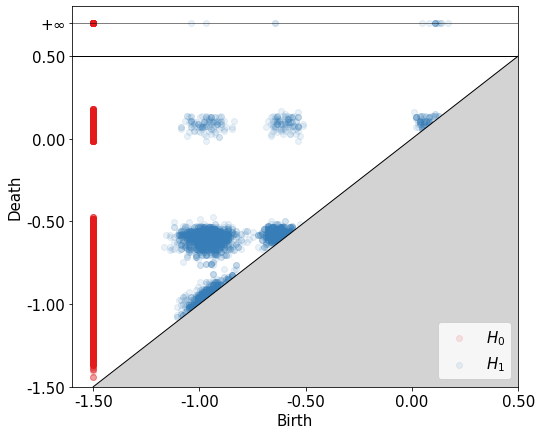

In [10]:
plot_pds(persistence_sbm,log_times)

(<Figure size 576x504 with 1 Axes>,
 <AxesSubplot:xlabel='Birth', ylabel='Death'>)

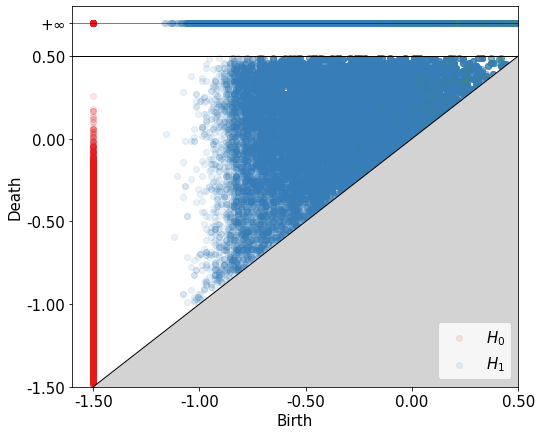

In [9]:
plot_pds(persistence_er,log_times)